## Test new concepts 

#### This file can be used to test new concepts based on the weights from the Sector+Category model trained on entire fruit data.
#### These weights can be found in the file getWeightsAllFruits.ipynb (Refer the notebook for reference as the weights are directly used here.)

### It is assumed that you have the Lab, RGB and category information for the new set of colors you are running. The above data is already there for UW-58 (default) and BCP-37 colors.

#### Initialize/ Modify these

In [1]:
# Initialize these:
import pandas as pd

# path to the git repo's downloads folder. This is where all sets of images are present.
path = "E:/GitRepo/Color-Concept-Associations-using-Google-Images/downloads"  #<Modify this>

# Folder inside downloads where the new concepts test images are.
typeImg = "newTestConcepts" 

# Image will be resized to sz x sz
sz = 100 

## Number of images to be used for generating features.
numImages = 5     #<Modify this>

# insert new concepts here.
allConcepts = ["petunia","roses"]  #<Modify this>

# Set dataFlag to True if (concepts are fruits from our experiments) AND (colors are UW58 colors).
# However, by default it is assumed you are running this notebook for new set of concepts or new set of colors.
dataFlag = False    #<Modify this>

#### SET THESE VARIABLES ####

# Set trueRatingsPresent to True if there exist true ratings of new concepts for colors. Save them as trueData.csv in the same folder as this file.
trueRatingsPresent = False    #<Modify this>
    
# Set to true if using UW-58 colors ---- Default
uw58 = True  # --Default--  #<you can modify this>

#Set to true if using BCP-37 colors
bcp37 = False   #<Modify this>

# data.csv ---> Contains true associated ratings for our fruit concepts for every UW-58 color.

### Initialize/ Modify these if using a new set of colors. Else, ignore the cell below.

In [2]:
if uw58 == False and bcp37 == False:
    numColors = 20 # number of new colors here.
    colNames = ["col_"+str(i) for i in range(numColors)]  # --don't modify --

    # trueData.csv is the true associated ratings for new test concepts for all new colors, if it exists.
    if trueRatingsPresent == True:
        data = pd.read_csv("trueData.csv",names = colNames)
    
    # RENAME FILENAMES IF NEEDED.
    
    # Get the LAB coordinates of colors from file Lab.csv (Required)
    colorData = pd.read_csv("Lab_newColors.csv",header=None)
    colorDataRGB = pd.read_csv("RGB_newColors.csv",header=None)

    # Categorical information about the colors (Required)
    category = pd.read_csv("Category_newColors.csv",header=None)

#### Gets proper color data if using uw58 colors.  DO NOT MODIFY.

In [3]:
if uw58 == True:
    numColors = 58 # number of new colors here.
    colNames = ["col_"+str(i) for i in range(numColors)]  # --don't modify --

    # trueData.csv is the true associated ratings for new test concepts for all new colors, if it exists.
    if trueRatingsPresent == True:
        if dataFlag == True:
            data = pd.read_csv("data.csv",names = colNames)
        else:
            data = pd.read_csv("trueData.csv",names = colNames)

    # Get the LAB coordinates of colors from file Lab.csv (Required)
    colorData = pd.read_csv("Lab.csv",header=None)
    colorDataRGB = pd.read_csv("RGB.csv",header=None)

    # Categorical information about the colors (Required)
    category = pd.read_csv("Category.csv",header=None)

#### Gets proper color data if using BCP37 colors.   DO NOT MODIFY.
#### Number of colors can be modified, but order should be maintained.

In [4]:
if bcp37 == True:
    numColors = 37 # number of new colors here.
    colNames = ["col_"+str(i) for i in range(numColors)] 

    # # trueData.csv is the true associated ratings for new test concepts for all colors, if it exists.

    if trueRatingsPresent == True:
        data = pd.read_csv("trueData.csv",names = colNames)

    # Get the LAB coordinates of colors from file Lab.csv (Required)
    colorData = pd.read_csv("TestScripts/Lab_test.csv",header=None)
    colorDataRGB = pd.read_csv("TestScripts/RGB_test.csv",header=None)

    # Categorical information about the colors (Required)
    category = pd.read_csv("TestScripts/Category_test.csv",header=None)

#### Saving the new concepts as .csv and defining weights from "getWeightsAllFruits.ipynb".   DO NOT MODIFY.

In [6]:
# save these concepts to a csv -- to avoid restating the allConcepts again
df = pd.DataFrame(allConcepts)
## save to csv file
filepath = 'testConcepts.csv'
df.to_csv(filepath, index=False, header = None)

# Weights from getWeightsAllFruits.ipynb  -- Model used entire fruit data for training
weights = [0.13629966, 0.13731228, 0.12712168, 0.31100729]

## Download the images (Optional). If you already have the images, save them inside downloads/newTestConcepts. Each concept's images should be inside a subfolder with the same name as concept.

### Uncomment (Select the cell -> Ctrl+A -> Ctrl+/ ) if you wish to download images from google.

In [64]:
# pip install google_images_download 

In [65]:
# # Add the concepts as keywords

# from google_images_download import google_images_download
# response = google_images_download.googleimagesdownload()
# arguments = {"keywords_from_file":"testConcepts.csv","limit":numImages, "output_directory":"downloads/newTestConcepts", "format":"jpg"}   #creating list of arguments
# paths = response.download(arguments)

# # type = (face, photo, clip-art, line-drawing, animated)
# # format = jpg, gif, png, bmp, svg, webp, ico, raw

#   DO NOT MODIFY THE CELLS BELOW.

In [66]:
# # Include imports
import glob
from skimage.transform import resize
from skimage.io import imread, imsave, imshow
import os

import numpy as np
import skimage.color as skcolor
import matplotlib.pyplot as plt

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import time

## Uses the images from the NEW concepts. 


#### Make sure all the images are not corrupt or damaged.

In [67]:
# Count total number of images

count = 0
for i in allConcepts:
    print(path + "/" +typeImg +"/" +i+"/*.*")
    trainFiles = glob.glob( path + "/" +typeImg +"/" +i+"/*.*" )
    count = count + len(trainFiles)
    print(count)
print("Category: ",typeImg)
print("Total images : ",count)

E:/GitRepo/Color-Concept-Associations-using-Google-Images/downloads/newTestConcepts/filk_w/*.*
120
E:/GitRepo/Color-Concept-Associations-using-Google-Images/downloads/newTestConcepts/slub_c/*.*
240
E:/GitRepo/Color-Concept-Associations-using-Google-Images/downloads/newTestConcepts/filk_c/*.*
360
E:/GitRepo/Color-Concept-Associations-using-Google-Images/downloads/newTestConcepts/slub_w/*.*
480
Category:  newTestConcepts
Total images :  480


## Extracting features from test Images

#### Features to be extracted are from Exp 1C

In [68]:
import matlab.engine
def getCategoriesMatrix(imageFileName,sz):
    ## Get total pixel counts of all 11 categories for this imageFile
    eng = matlab.engine.start_matlab()
    imageCat = np.array(eng.getCategories(imageFileName,sz))
    eng.quit()
     # imageCat : sz x sz matrix where each pixel has its category
    return imageCat

def getSegmentedImage(imageFileName,sz): # Returns segmented pixels in LAB and its corresponding color category.
    eng = matlab.engine.start_matlab()
    segImg, segImgCat = eng.activeContourSegmentation(imageFileName,sz, nargout=2)
    eng.quit()
    segImg = np.array(segImg)/255;
    segImg = skcolor.rgb2lab(segImg)
    segImgCat = np.array(segImgCat)
    return segImg, segImgCat


In [ ]:
numFt = 3
if trueRatingsPresent == True:
    X = np.zeros((count*numColors,numFt+1) )  # +1 for label #Number of features [] # Feature Vector -- 58N rows
else:
    X = np.zeros((count*numColors,numFt))
    
init = time.time()
rowNum = -1
strtInd = []  # To keep track of the starting indices of concepts in the feature matrix
cvInd = 1 
counter = 0
sz = 100    # Size of image: 100 by 100

# Feature tolerations used by Sector+Category
Rc = [1,10,20,30,40]  
Li = [40]             
R = [40]               
hueAngle = [40]        
##
for conceptNum,concept in enumerate(allConcepts):
    #conceptNum = 5
    t0 = time.time()
    print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>\n",conceptNum+1,": Concept : ",concept)
    ct = 0    # Keeps track of images inside a category
    strtInd.append(counter)
    trainFiles = glob.glob( path + "/" +typeImg +"/" +concept+"/*.*" )
    print("\tTotal number of images for ",concept," : ",len(trainFiles))
    t = []
    for m, nameFile in enumerate(trainFiles):
        t1 = time.time()
        #print("\nReading file ......")
        ct = ct + 1
        
        image = imread( nameFile )
        imageResized = resize( image, (sz,sz),anti_aliasing=True,mode='reflect')
        img = imageResized
        # Convert the pixels in  image to LAB space
        imgLAB = skcolor.rgb2lab(img)
        segmentedImg,segmentedImgCat = getSegmentedImage(nameFile,sz)
        imageWithCategories = getCategoriesMatrix(nameFile,sz)
        
        i1 = imgLAB[27:72,27:72,:] 
        i6 = np.copy(segmentedImg)
        
        ii1 = imageWithCategories[27:72,27:72].flatten()
        
        categoryImg1 = [sum(1 for p in ii1 if p-1 == k)/ii1.size for k in range(11)]
      
        for color in range(numColors):
            rowNum+=1
            counter += 1
            colCt = 0
            colorLAB = np.array(colorData.loc[color])   #get LAB values for specific color

            # Just need 2 features from Sectors
            for i in [0,5]:
                if i == 0:
                    L = i1[:,:,0]
                    a = i1[:,:,1]
                    b = i1[:,:,2]
                elif i == 1:
                    L = i2[:,:,0]
                    a = i2[:,:,1]
                    b = i2[:,:,2]
                elif i == 2:
                    L = i3[:,:,0]
                    a = i3[:,:,1]
                    b = i3[:,:,2]
                elif i == 3:
                    L = i4[:,:,0]
                    a = i4[:,:,1]
                    b = i4[:,:,2]
                elif i == 4:
                    L = i5[:,:,0]
                    a = i5[:,:,1]
                    b = i5[:,:,2]
                else:
                    L = i6[:,:,0]
                    a = i6[:,:,1]
                    b = i6[:,:,2]
                    
                LTemp = L.flatten()
                r = np.sqrt(a**2+b**2).flatten()
                theta = np.degrees(np.arctan2(b,a)).flatten()

                L_diff = np.abs(LTemp - colorLAB[0])
                r_diff = np.abs(r - (np.sqrt(colorLAB[1]**2 + colorLAB[2]**2)))
                theta_diff = np.abs(theta - np.degrees(np.arctan2(colorLAB[2],colorLAB[1])))

                for j,r_th in enumerate(R):
                    l_th = Li[j] # L and R are the same.
                    for theta_th in hueAngle:
                        pixels = 0
                        for p in range(len(L_diff)):
                            if (L_diff[p] <= l_th and r_diff[p] <= r_th and theta_diff[p] <= theta_th) or (L_diff[p] <= l_th and r_diff[p] <= 2.5):
                                pixels += 1
                        X[rowNum,colCt] = pixels/(len(L_diff))
                        colCt+=1
            #print(colCt)
            
            colorCat = category.loc[color,0] 
            X[rowNum,colCt] = categoryImg1[colorCat-1]
            
            if trueRatingsPresent == True:
                colCt+=1
                label = data.loc[conceptNum]['col_'+str(color)]   
                X[rowNum,colCt] = label
            #print(colCt)
        h = time.time()-t1
        print("\t\t",m, "image: ",h ," seconds")
        t.append(h)
    print(t)
    print("\t** Time elapsed since last category: ",time.time()-t0," seconds **")
strtInd.append(len(X))
print(strtInd)
print("** Total Time elapsed: ",time.time()-init," seconds **")

>>>>>>>>>>>>>>>>>>>>>>>>>>>>
 1 : Concept :  filk_w
	Total number of images for  filk_w  :  120
		 0 image:  147.45319485664368  seconds
		 1 image:  31.812931776046753  seconds
		 2 image:  31.188518047332764  seconds
		 3 image:  31.41026258468628  seconds
		 4 image:  28.847904682159424  seconds
		 5 image:  32.845922231674194  seconds
		 6 image:  31.115629196166992  seconds
		 7 image:  31.065399169921875  seconds
		 8 image:  32.771485328674316  seconds
		 9 image:  29.8766667842865  seconds
		 10 image:  29.670668840408325  seconds
		 11 image:  31.970021724700928  seconds
		 12 image:  29.472307443618774  seconds
		 13 image:  29.95218849182129  seconds
		 14 image:  29.096651077270508  seconds
		 15 image:  31.597654342651367  seconds
		 16 image:  30.242610692977905  seconds
		 17 image:  30.908700704574585  seconds
		 18 image:  30.2010440826416  seconds
		 19 image:  29.73708486557007  seconds
		 20 image:  32.384079456329346  seconds
		 21 image:  33.66658091545105  second

		 16 image:  23.616819858551025  seconds
		 17 image:  24.651023149490356  seconds
		 18 image:  23.752487182617188  seconds
		 19 image:  24.311928749084473  seconds
		 20 image:  24.880441188812256  seconds
		 21 image:  24.955605030059814  seconds
		 22 image:  27.010565996170044  seconds
		 23 image:  29.27434802055359  seconds
		 24 image:  25.82888126373291  seconds
		 25 image:  28.484065294265747  seconds
		 26 image:  29.552976846694946  seconds
		 27 image:  26.130692958831787  seconds
		 28 image:  21.29307985305786  seconds
		 29 image:  22.081913232803345  seconds
		 30 image:  24.29198145866394  seconds
		 31 image:  19.500831365585327  seconds
		 32 image:  19.417086839675903  seconds
		 33 image:  23.619415521621704  seconds
		 34 image:  23.557859420776367  seconds
		 35 image:  25.620429277420044  seconds
		 36 image:  23.08025312423706  seconds
		 37 image:  22.067963361740112  seconds
		 38 image:  23.263761520385742  seconds
		 39 image:  21.334959268569946  secon

		 33 image:  22.85897159576416  seconds
		 34 image:  20.8495135307312  seconds
		 35 image:  20.1188907623291  seconds
		 36 image:  19.20166778564453  seconds
		 37 image:  20.3568913936615  seconds
		 38 image:  19.0878963470459  seconds
		 39 image:  20.912147521972656  seconds
		 40 image:  19.924404621124268  seconds
		 41 image:  18.36648941040039  seconds
		 42 image:  19.285052061080933  seconds
		 43 image:  21.003655910491943  seconds
		 44 image:  19.81936764717102  seconds
		 45 image:  19.73300838470459  seconds
		 46 image:  19.870838403701782  seconds
		 47 image:  18.99186110496521  seconds
		 48 image:  18.520705699920654  seconds
		 49 image:  20.84811019897461  seconds
		 50 image:  19.40199637413025  seconds
		 51 image:  19.991058111190796  seconds
		 52 image:  19.612004041671753  seconds
		 53 image:  20.037544012069702  seconds
		 54 image:  19.49667978286743  seconds
		 55 image:  20.828781843185425  seconds
		 56 image:  18.677825927734375  seconds
		 57 ima

		 50 image:  26.588144540786743  seconds
		 51 image:  25.716920137405396  seconds
		 52 image:  34.18554902076721  seconds
		 53 image:  18.23840618133545  seconds
		 54 image:  22.020556211471558  seconds
		 55 image:  26.67707848548889  seconds
		 56 image:  27.461855173110962  seconds
		 57 image:  27.537051916122437  seconds


## Save the data as excel spread sheet

In [12]:
X.shape
# This should be of the shape :
    #(numImages*number of Concepts*numColors, 3) or {(numImages*number of Concepts*numColors, 4) if true ratings are present}.

(17760, 4)

In [13]:
## convert your array into a dataframe
xxTemp = np.copy(X)
#y = np.copy(X[:,-1])
df = pd.DataFrame(xxTemp)

## save to xlsx file

filepath = 'dataNewConcepts.xlsx'
df.to_excel(filepath, index=False)
tot = len(xxTemp)

# Analysis

In [28]:
#Comment this: 
#strtInd = [0, 1850, 3700, 5550, 7400, 9250, 11100]
strtInd

[0, 4440, 8880, 13320, 17760]

In [19]:
filepath = 'dataNewConcepts.xlsx'
df = pd.read_excel(filepath)
Q = df.as_matrix()
Q.shape

(17760, 4)

In [27]:
len(Q)

17760

In [31]:
df.head()

,0,1,2,3
0,0.000000,0.000000,0.00000,0.68915
1,0.371358,0.757519,0.00000,0.48859
2,0.093333,0.150376,0.02321,0.42716
3,0.044938,0.001880,0.00000,0.35264
4,0.000000,0.000000,0.00000,0.70457


In [47]:
if trueRatingsPresent == True:
    Xtest = np.column_stack([np.ones((len(Q),1)), Q[:,:-1]])
    ytest = np.copy(Q[:,-1])
else:
    # Since there are no true ratings present, we don't have ytest.
    Xtest = np.column_stack([np.ones((len(Q),1)), Q])

In [48]:
strtInd

[0, 4440, 8880, 13320, 17760]

In [22]:
y_predAll = Xtest.dot(weights)

In [26]:
# Contains the predicted ratings.
y_predAll.shape

(17760,)

# The following evaluation can only be done if true associated ratings are present, however it will give average predicted ratings for every concept snd color regardless.

In [24]:
if trueRatingsPresent == True:
    from scipy import stats
    plt.close('all')
    win0_50 = []  # saves correlation for testConcept
    win1_50 = []  # saves true rating for testConcept
    win2_50 = []  # saves avg predicted rating for testConcept

    correlation_50 = []
    error_50 = []

    for i in range(len(strtInd)-1):
        testConcept =  allConcepts[i]

        y_pred = np.copy(y_predAll[strtInd[i]:strtInd[i+1]])
        y_test = np.copy(ytest[strtInd[i]:strtInd[i+1]])
        print(y_pred.shape)
        totalTestImages = y_pred.size/numColors  #numColors*N rows -> every image has 'numColors' rows of data
        avg_pred =[np.sum([y_pred[p] for p in range(q,y_pred.size,numColors)])/totalTestImages for q in range(numColors)]

        # For Pearson correlation coefficient and the p-value (between avg_pred and true rating for fruit group)
        trueRating = np.copy(y_test[0:numColors])

        sqErr = np.sum(pow(avg_pred - trueRating,2))
        print("The true squared error (in color ratings) for left out concept",testConcept,"is: %.4f" % sqErr)

        corrCoeff, pVal = stats.pearsonr(avg_pred, trueRating)

        print("\nPearson’s correlation coefficient (between true ratings and avg predicted ratings) is %.4f" %corrCoeff)
        print("p-value %.4f" %pVal)

        error_50.append(sqErr)
        correlation_50.append(corrCoeff)
        win0_50.append(corrCoeff) # saves correlation for testConcept
        win1_50.append(trueRating) # saves true rating for testConcept
        win2_50.append(avg_pred)   # saves avg predicted rating for testConcept
        
    # ####Plot average color rating over all test images.
#         fig= plt.figure(figsize=(10,3))
#         barPlot = plt.bar(range(1,numColors+1),avg_pred,color = colorDataRGB.values,edgeColor = [0, 0, 0])
#         plt.ylabel('Ratings')
#         plt.xlabel('Colors')
#         plt.title('Predicted color ratings for Concept : %s' %testConcept)
#         plt.xticks([i for i in range(1,numColors+1,3)],[i for i in range(1,numColors+1,3)])
#         plt.ylim(0,1)
#         plt.show()

#         fig= plt.figure(figsize=(10,3))
#         barPlot = plt.bar(range(1,numColors+1), trueRating,color = colorDataRGB.values,edgeColor = [0, 0, 0])
#         plt.ylabel('Ratings')
#         plt.xlabel('Colors')
#         plt.title('True color ratings for Concept : %s' %testConcept)
#         plt.xticks([i for i in range(1,numColors+1,3)],[i for i in range(1,numColors+1,3)])
#         plt.ylim(0,1)
#         plt.show()

#         # Scatter plot
#         fig2 = plt.figure(figsize=(7,7))
#         plt.scatter(trueRating,avg_pred,c=colorDataRGB.values,s=80,marker = 'o',linewidths=0.5,edgeColor = [0, 0, 0])
#         plt.ylabel('Predicted Ratings')
#         plt.xlabel('Subject Ratings')
#         plt.title('Scatter plot of color ratings for : %s' %testConcept)
#         plt.axis('equal')
#         plt.xlim(0,1)
#         plt.ylim(0,1)
#         plt.show() 
else:
    win2_50 = [] # saves avg predicted rating for testConcept
    for i in range(len(strtInd)-1):
        testConcept =  allConcepts[i]

        y_pred = np.copy(y_predAll[strtInd[i]:strtInd[i+1]])
        #y_test = np.copy(ytest[strtInd[i]:strtInd[i+1]])
        #print(y_pred.shape)
        totalTestImages = y_pred.size/numColors  #numColors*N rows -> every image has 'numColors' rows of data
        avg_pred =[np.sum([y_pred[p] for p in range(q,y_pred.size,numColors)])/totalTestImages for q in range(numColors)]
        win2_50.append(avg_pred)

(4440,)
The true squared error (in color ratings) for left out concept filk_c is: nan

Pearson’s correlation coefficient (between true ratings and avg predicted ratings) is nan
p-value 1.0000
(4440,)
The true squared error (in color ratings) for left out concept filk_w is: nan

Pearson’s correlation coefficient (between true ratings and avg predicted ratings) is nan
p-value 1.0000
(4440,)
The true squared error (in color ratings) for left out concept slub_c is: nan

Pearson’s correlation coefficient (between true ratings and avg predicted ratings) is nan
p-value 1.0000
(4440,)
The true squared error (in color ratings) for left out concept slub_w is: nan

Pearson’s correlation coefficient (between true ratings and avg predicted ratings) is nan
p-value 1.0000


C:\Users\rgnra\Anaconda3\lib\site-packages\scipy\stats\stats.py:5256: RuntimeWarning: invalid value encountered in less
  x = np.where(x < 1.0, x, 1.0)  # if x > 1 then return 1.0


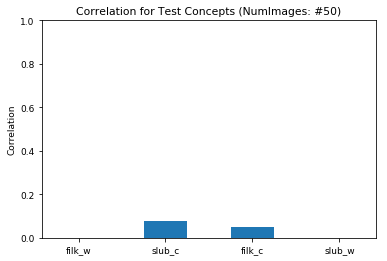

In [119]:
if trueRatingsPresent == True:
    plt.close('all')
    barWidth = 0.5
    plt.bar(range(1,len(allConcepts)+1),win0_50, width = barWidth)
    plt.xticks(range(1,len(allConcepts)+1),allConcepts)
    plt.title("Correlation for Test Concepts (NumImages: #50)")
    plt.ylabel('Correlation')
    plt.ylim(0,1)
    plt.show()

## Save the estimated output ratings as EstimatesNewConcepts.csv

In [85]:
conceptNames = []
colorRow = []
for i in range(len(allConcepts)):
    for j in range(numColors):
        conceptNames.append(allConcepts[i])
        colorRow.append(j+1)

if trueRatingsPresent == True:
    matrix = np.column_stack((np.array(conceptNames), np.array(colorRow), np.array(win1_50).flatten(), np.array(win2_50).flatten()))
else:
    matrix = np.column_stack((np.array(conceptNames), np.array(colorRow), np.array(win2_50).flatten()))
    
print(matrix.shape)
if trueRatingsPresent == True:
    df = pd.DataFrame(matrix, columns = ["Concept","Color","True Rating","Sector+Category Model Estimates"])
else:
    df = pd.DataFrame(matrix, columns = ["Concept","Color","Sector+Category Model Estimates"])

## save to csv file
print(df.head())
filepath = 'EstimatesNewConcepts.csv'
df.to_csv(filepath, index=False)

(116, 3)
   Concept Color Sector+Category_Model_Estimates
0  Petunia     1              0.1646296232331118
1  Petunia     2             0.17331291734487358
2  Petunia     3             0.18976300046285227
3  Petunia     4              0.1825578135096611
4  Petunia     5             0.36704135169795304


# Scatter Plots 
### Modify number of subplots

In [137]:
import matplotlib as mpl
mpl.rcParams.update({'font.size': 9})
def createScatterPlots(indices, win0, win1, win2,numImages):
    model_num = 3
    print("----------------------- Creating plots for Model ---------------Sector+Category")
    # print(indices)
    # print(win0)
    
    k = 1
    plt.close('all')
    #plt.subplots(len(allConcepts),5,1,figsize=(5,4))
    for i in range(len(indices)-1,-1,-1):
        # Scatter plot

        arg = indices[i]
        trueRating = win1[arg]
        avg_pred = win2[arg]

        ax = plt.subplot(2,2,k,aspect='equal') #plt.figure(figsize=(7,7))
        #ax = f.add_subplot(3,4,k)
        plt.scatter(trueRating,avg_pred,c=colorDataRGB.values[:numColors],marker = 'o',s=15) #, edgecolor = [0,0,0])
        if k == 1 or k == 4:
            plt.ylabel('Mean Predicted Rating')
        plt.xlabel('Mean Rating')
        s = allConcepts[arg]+"( %.2f )" %win0[arg]
        #print(s)
        plt.title(s)
        plt.xlim(0,1)
        plt.ylim(0,1)
        plt.yticks([0,0.5,1])
        plt.xticks([0,0.5,1])
        plt.tick_params(direction='in')
        plt.plot(np.unique(trueRating), np.poly1d(np.polyfit(trueRating, avg_pred, 1))(np.unique(trueRating)),'k--')
        k = k+1
    plotName = "Test_ScatterPlot_Model_"+str(numImages)+".pdf"
    plt.tight_layout()
    plt.subplots_adjust(wspace=0.3, hspace=0.5)
    #plt.savefig(plotName, bbox_inches = 'tight', pad_inches = 0)
    plt.show()
    
    


----------------------- Creating plots for Model ---------------Sector+Category


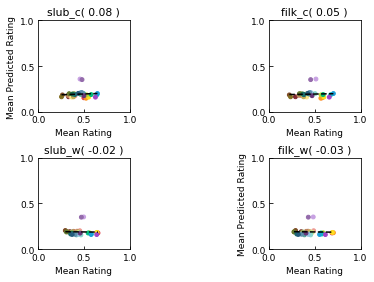

In [138]:
if trueRatingsPresent == True:
    indices = np.argsort(win0_50)
    createScatterPlots(indices, win0_50, win1_50, win2_50,50)

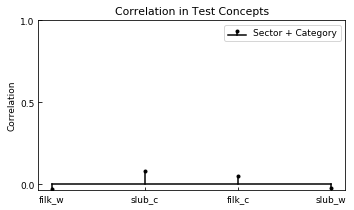

In [111]:
if trueRatingsPresent == True:
    plt.close('all')
    barWidth = 0.1
    #r1 = [0.4,0.8,1.2,1.6,2,2.4]
    r1 = [0.1+(0.3*x) for x in range(len(allConcepts))]
    r2 = [x + barWidth for x in r1]
    r3 = [x + 2*barWidth for x in r1]

    #t.bar(r1, bars1, width = barWidth, color = 'blue', edgecolor = 'black', yerr=yer1, capsize=7, label='poacee')
    fig = plt.figure(figsize =(5,3)) # (3,1.5)

    mline3 = plt.stem(r1,correlation_50,label='Sector + Category')
    plt.setp(mline3, color=[0,0,0], linewidth=1.5, markersize = 3)

    plt.xticks(r1,allConcepts)
    plt.yticks([0,0.5,1])
    plt.tick_params(direction='in')
    plt.title("Correlation in Test Concepts")
    plt.ylabel('Correlation')
    plt.legend()

    plt.tight_layout()
    #plt.savefig('NewConcepts_Correlation.pdf')
    plt.show()
